# Homework 7 KNN

## Derek Anderson, Justin Dygert, Cameron Miller

### Problem 1

1. Drop the dteday variable and then define your feature space and the target variable. Split the data into test (20%) and train set (80%)

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')
rand_state = 1000

The following code labels the features as categories or numeric. We then drop dteday and create the dummy variables.

In [112]:
df = pd.read_csv("bikeshare.csv")
categoricals = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday', 'weathersit']
numerics = ['temp', 'hum', 'windspeed', 'cnt']

for col in categoricals:
    df[col] = df[col].astype("category")
    
for col in numerics:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
df.drop('dteday', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first = True)

The following checks the head to make sure the dummies function worked and defines our feature space and target variable. Then splits the dataset.

In [113]:
df.head()

y = df['cnt']
X = df.drop('cnt', axis=1) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)


2. From sklearn.neighbors import the relevant function for KNN regression. Do the followings: 

In [114]:
from sklearn.neighbors import KNeighborsRegressor

2.1 Train all the model with the default features.

In [115]:
KNN_regression = KNeighborsRegressor()
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

2.2 Make predictions on the test set and save them as y_hat

In [116]:
y_hat = KNN_regression.predict(X_test)

2.3 Construct a data frame named df_predictions with 2 columns. y_test, and y_hat  from previous part 

In [117]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4495,26,47.0
4418,47,90.4
7141,11,25.2
14765,205,184.8
16541,65,68.0


2.4 Visualize actual vs predicted counts in the test set using an scatterplot. Are you visually satisfied with the regression model? 

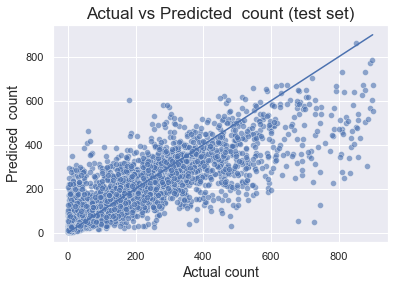

In [118]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

Visually we are satisfied. It looks a little high, because of all the heavy collection at the bottom. Overall, we give it an A-.

2.5 Report the RMSE_test for the KNN regression model. 

In [119]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

108.61

3. Cross validation:

3.1 Estimate the RMSE_test by doing a 5 fold cross validation on the train set and name it as RMSE_CV. 

In [120]:
from sklearn.model_selection import cross_val_score
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

109.9006

The cross validated RMSE increased which makes sense, the initial RMSE was "cheating".

3.2 Plot the RMSE_CV vs K and find the optimal value for K in the KNN regression model.

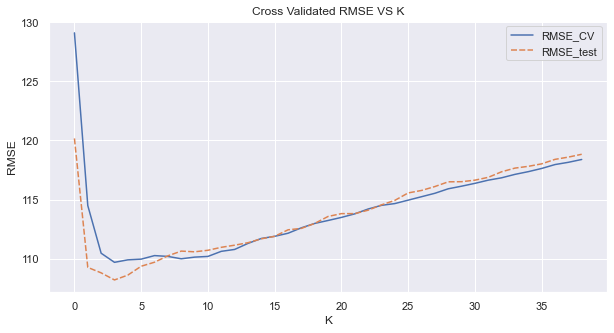

In [121]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2), 'K':range(1,k)})

plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k.drop('K', axis=1))
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

In [122]:
optimal_k.loc[np.argmin(optimal_k['RMSE_CV']), 'K']

4

As seen from the plot, and the line of code, our optimal K is 4. We foundt his from the plot by picking the lowest point on the blue RMSE_CV curve.

4. Report the R-squared in the test set with the optimal k for KNN. Compare this number with R-squared in the test set using multiple regression model. Which model is performing better in the test set? 

In [123]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

X_train_wc = sm.add_constant(X_train)
X_test_wc = sm.add_constant(X_test)

sm.OLS(y_test, X_test).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:49:51   Log-Likelihood:                -20990.
No. Observations:                3476   AIC:                         4.208e+04
Df Residuals:                    3424   BIC:                         4.240e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp            40.3252      4.105      9.822      0.000      32.276      48.375
hum            -14.7914      2.404     -6.152      0.000     -19.505     -10.078
windspeed       -1.3452      1.924     -0.699      0.484      -5.117       2.427
season_2        35.9084     10.739      3.344      0.001      14.853      56.963
season_3        34.7548     13.002      2.673      0.008       9.263      60.247
season_4        71.7850     11.104      6.465      0.000      50.014      93.556
yr_1            85.0945      3.519     24.178      0.000      78.194      91.995
mnth_2           8.6401      9.034      0.956      0.339      -9.073      26.353
mnth_3          19.7616      9.765      2.024      0.043       0.616      38.907
mnth_4          16.3931     14.652      1.119      0.263     -12.335      45.121
mnth_5          35.7545     15.717      2.275      0.023       4.938      66.571
mnth_6          22.4899     16.092      1.398      0.162      -9.062      54.042
mnth_7          10.2197     18.130      0.564      0.573     -25.328      45.767
mnth_8          11.3010     17.697      0.639      0.523     -23.397      45.999
mnth_9          29.2601     15.697      1.864      0.062      -1.517      60.037
mnth_10         37.0080     14.429      2.565      0.010       8.718      65.299
mnth_11          1.3284     14.104      0.094      0.925     -26.325      28.982
mnth_12         -3.8431     11.274     -0.341      0.733     -25.947      18.261
hr_1           -12.6162     12.047     -1.047      0.295     -36.236      11.004
hr_2           -19.9897     12.123     -1.649      0.099     -43.758       3.779
hr_3           -41.1354     12.143     -3.387      0.001     -64.944     -17.326
hr_4           -44.5798     12.102     -3.684      0.000     -68.307     -20.852
hr_5           -30.6293     11.983     -2.556      0.011     -54.125      -7.134
hr_6            38.4007     12.231      3.140      0.002      14.420      62.382
hr_7           184.7978     12.078     15.300      0.000     161.117     208.479
hr_8           277.2199     12.165     22.788      0.000     253.368     301.072
hr_9           169.2628     12.555     13.482      0.000     144.647     193.879
hr_10          116.4020     12.300      9.464      0.000      92.287     140.517
hr_11          130.5947     12.307     10.612      0.000     106.465     154.724
hr_12          168.7284     12.614     13.376      0.000     143.996     193.461
hr_13          164.7255     12.473     13.207      0.000     140.270     189.181
hr_14          162.5089     12.369     13.139      0.000     138.258     186.760
hr_15          165.2119     12.443     13.278      0.000     140.816     189.608
hr_16          242.6892     12.648     19.188      0.000     217.891     267.487
hr_17          402.5835     12.682     31.744      0.000     377.718     427.449
hr_18

In [124]:
KNN_regression = KNeighborsRegressor(n_neighbors=4)
KNN_regression.fit(X_train, y_train)

KNN_regression.score(X_test, y_test)

0.6583977754609158

We used the score function from the KNeighborsRegressor and got an R-squared of .658 which is pretty good. The Regression r-squared was .7 which is just a little better than the KNN regression.

### Problem 2

1. Define a binary target variable overload. Overload=1 if cnt>500 and 0 otherwise. What are the proportions of overload vs non-overload in your data set? Is the target variable balanced or imbalanced?

In [125]:
df['overload'] = np.where(df['cnt'] > 500, 1, 0)
df.drop('cnt', axis=1, inplace=True)
df.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4,overload
0,-1.334609,0.947345,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,-1.438475,0.895513,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,-1.438475,0.895513,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,-1.334609,0.636351,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,-1.334609,0.636351,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [126]:
pd.crosstab(df['overload'],df['overload'], normalize='all')*100


overload,0,1
overload,,
0,92.640543,0.000000
1,0.000000,7.359457


The target variable is very unbalanced. Only 7% of the observations are overload.

2. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set (70%)

In [127]:
y = df['overload']
X = df.drop('overload', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

3. From sklearn.neighbors import the relevant function for KNN classification. Do the followings: 

In [128]:
from sklearn.neighbors import KNeighborsClassifier

3.1 Train the KNN classification model using its default parameters.

In [129]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

3.2 Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively. 

In [130]:
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 

3.3 Plot the histogram of y_hat_probs? Explain what you see? Is there a probability threshold at which the model always predict negative or positive?

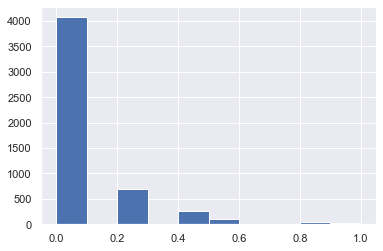

In [131]:
plt.hist(y_hat_probs)
plt.show()

The probabilities are right skewed. This means there are lots of observations that have low probabilities of being on overload. There are only a handful that have probabilities greater than .5. It looks like around 85-90% of the data falls below the .5 threshold.If we chooe a threshold of .9 all of the observations would be marked as not overloaded.

3.4 Generate predicted classifications for two different thresholds (30% and 70% threshold). Save these new predictions as y_hat_30 and y_hat_70. Which threshold should you use if your goal is to avoid too many false negatives? Explain your answer.

In [132]:
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

Decreasing the threshold decreases the false negatives, so we would pick .3 as our threshold over .7.

3.5 Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous parts

In [133]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})
df_predictions.head()

,y_test,y_hat_probs,y_hat_30,y_hat_70
4495,0,0.0,0,0
4418,0,0.0,0,0
7141,0,0.0,0,0
14765,0,0.0,0,0
16541,0,0.0,0,0


4. Borrow my_KNN_report() function from the python notebook of class 13.

In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5, weights='uniform'):
    knn= KNeighborsClassifier(n_neighbors=K, weights=weights)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled

4.1 Report the Accuracy, precision, recall and f1 score along with the confusion matrix for threshold =0.5. Interpret all these statistics. Do you trust the accuracy of the model? why?

In [135]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5, weights='uniform')

-----------------------------------------
Accuracy  = 0.945
Error_rate  = 0.055
Precision = 0.82
Recall    = 0.35
f1_score  = 0.49
MCC       = 0.51
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4788,31
Actual : positive,256,139


The accuracy is .945, precision is .82, recall is .35 and f1 is .49. Our recall is how well our model predicts positives, our recall value is low, so our model is not that good at identifying true positives, it only got about 30% of the true positives. There are a lot of false negatives and the target variable is very unbalanced, so we would not trust this accuracy very much. The precision is fairly high, so our model is predicting positives more often.

4.2 Now use threshold = 0.3 in the my_logistic_report() function. what happens to accuracy, precision, recall and f1 score? what happens to false negatives? is this consistent with you answer to question 5.4? 

In [136]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.3, weights='uniform')

-----------------------------------------
Accuracy  = 0.9334
Error_rate  = 0.0666
Precision = 0.56
Recall    = 0.61
f1_score  = 0.58
MCC       = 0.55
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4626,193
Actual : positive,154,241


The accuracy decreases and the false negatives increase. This is what we knew would happen when we lowered the threshold. Our recall rose which makes sense because we lowered the threshold which decrease false negatives. Our precision declined quite a bit, which also makes sense because we are lowering the threshold and making it easier to be considered "positive". 

5. Plot the ROC curve and report the AUC score. Is your model doing a better job than random prediction (no skill)?

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.886


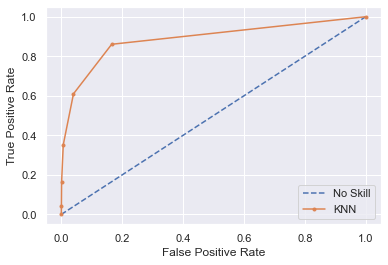

In [137]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

ns_probs = [0 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Our AUC is .886, which is greater than .5 which means we are better than just guessing.

6. Cross validation:

6.1 Estimate the error_rate_test by doing a 5 fold cross validation on the train set and name it as error_rate_CV. 

In [138]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

accuracy = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
error_rate_CV=round((1-accuracy).mean(),4)
error_rate_CV

0.0562

6.2 Plot the error_rate_CV vs K and find the optimal value for K in the KNN classification model.

7. As the manager of Capital Bikeshare, you are dealing with a trade off between unexpected overload cost and cost of idle bikes. If the cost of a single idle bike is smaller than the cost of a single unexpected overload, then which of the following probability thresholds would satisfy your objective? 0.3, 0.5 or 0.7? 

It costs more when there are unexpected overloads. Unexpected overloads are false non-overloads, or false negatives. We want to decrease these and to do that, we decrease the threshold. So we would pick the .3 threshold.